In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

/tmp/ipykernel_899/3319391993.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("wikiart_art_pieces.csv")
df['index'] = range(0, len(df))

In [3]:
df.head()

,artist,style,genre,movement,tags,url,img,file_name,index
0,Byzantine Mosaics,Early Byzantine (c. 330–750),religious painting,Byzantine Art,"['Holyplaces', 'Byzantinearchitecture', 'Arch'...",https://www.wikiart.org/en/byzantine-mosaics/e...,https://uploads2.wikiart.org/00211/images/byza...,0-ravenna-cappella-arcivescovile-166.jpg,0
1,Byzantine Mosaics,Early Byzantine (c. 330–750),religious painting,Byzantine Art,"['Holyplaces', 'Byzantinearchitecture', 'Arch']",https://www.wikiart.org/en/byzantine-mosaics/e...,https://uploads2.wikiart.org/00211/images/byza...,1-ravenna-cappella-arcivescovile-167.jpg,1
2,Byzantine Mosaics,Early Byzantine (c. 330–750),religious painting,Byzantine Art,"['Prophet', 'History']",https://www.wikiart.org/en/byzantine-mosaics/e...,https://uploads2.wikiart.org/00211/images/byza...,2-ravenna-cappella-arcivescovile-168.jpg,2
3,Byzantine Mosaics,Early Byzantine (c. 330–750),religious painting,Byzantine Art,"['Holyplaces', 'Prophet']",https://www.wikiart.org/en/byzantine-mosaics/e...,https://uploads2.wikiart.org/00211/images/byza...,3-ravenna-cappella-arcivescovile-169.jpg,3
4,Byzantine Mosaics,Early Byzantine (c. 330–750),religious painting,Byzantine Art,"['Holyplaces', 'Prophet']",https://www.wikiart.org/en/byzantine-mosaics/e...,https://uploads2.wikiart.org/00211/images/byza...,4-ravenna-cappella-arcivescovile-171.jpg,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176436 entries, 0 to 176435
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   artist     176436 non-null  object
 1   style      176436 non-null  object
 2   genre      176436 non-null  object
 3   movement   176436 non-null  object
 4   tags       127710 non-null  object
 5   url        176436 non-null  object
 6   img        176436 non-null  object
 7   file_name  176436 non-null  object
 8   index      176436 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


In [5]:
df.describe()

,index
count,176436.000000
mean,88217.500000
std,50932.830385
min,0.000000
25%,44108.750000
50%,88217.500000
75%,132326.250000
max,176435.000000


In [6]:
df['style'].describe()


count            176436
unique              193
top       Impressionism
freq              16083
Name: style, dtype: object

In [7]:
print(df['style'].value_counts())

Impressionism                        16083
Realism                              15764
Romanticism                          15010
Expressionism                        11455
Post-Impressionism                    8147
                                     ...  
Pskov school of icon painting            1
Shin-hanga                               1
New media art                            1
Stroganov school of icon painting        1
Early Christian                          1
Name: style, Length: 193, dtype: int64


In [32]:
style_list = list(df['style'].value_counts().index)
print(style_list)
style_num = list(df['style'].value_counts())
print(style_num)
print('Number of styles:', len(style_list))

['Impressionism', 'Realism', 'Romanticism', 'Expressionism', 'Post-Impressionism', 'Baroque', 'Art Nouveau (Modern)', 'Unknown', 'Surrealism', 'Symbolism', 'Neoclassicism', 'Abstract Expressionism', 'Rococo', 'Northern Renaissance', 'Cubism', 'Pop Art', 'Academicism', 'Minimalism', 'Conceptual Art', 'Art Informel', 'Naïve Art (Primitivism)', 'Early Renaissance', 'Abstract Art', 'Magic Realism', 'Contemporary Realism', 'High Renaissance', 'Neo-Expressionism', 'Orientalism', 'Color Field Painting', 'Op Art', 'Lyrical Abstraction', 'Fauvism', 'Contemporary', 'Neo-Impressionism', 'Social Realism', 'Naturalism', 'Neo-Romanticism', 'Kitsch', 'Post-Minimalism', 'Socialist Realism', 'Art Deco', 'Ink and wash painting', 'Tachisme', 'Neo-Dada', 'Hard Edge Painting', 'Regionalism', 'Pictorialism', 'Neo-Pop Art', 'Constructivism', 'Transavantgarde', 'Street art', 'Mannerism (Late Renaissance)', 'Tenebrism', 'Outsider art', 'Proto Renaissance', 'Feminist Art', 'Art Brut', 'Futurism', 'Biedermeier',

Taking only 22 styles, because dataset it too big. There were 196 styles overall.

In [33]:
splits = np.array_split(style_list, 9)
splits_num = np.array_split(style_num, 9)
style_l1 = splits[0]
style_n1 = splits_num[0]
print(style_l1)
print(style_n1)
print('Number of styles:',len(style_l1))

['Impressionism' 'Realism' 'Romanticism' 'Expressionism'
 'Post-Impressionism' 'Baroque' 'Art Nouveau (Modern)' 'Unknown'
 'Surrealism' 'Symbolism' 'Neoclassicism' 'Abstract Expressionism'
 'Rococo' 'Northern Renaissance' 'Cubism' 'Pop Art' 'Academicism'
 'Minimalism' 'Conceptual Art' 'Art Informel' 'Naïve Art (Primitivism)'
 'Early Renaissance']
[16083 15764 15010 11455  8147  7496  7382  7039  6988  5224  4360  3909
  3537  3089  2530  2517  2474  2077  1818  1797  1754  1729]
Number of styles: 22


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

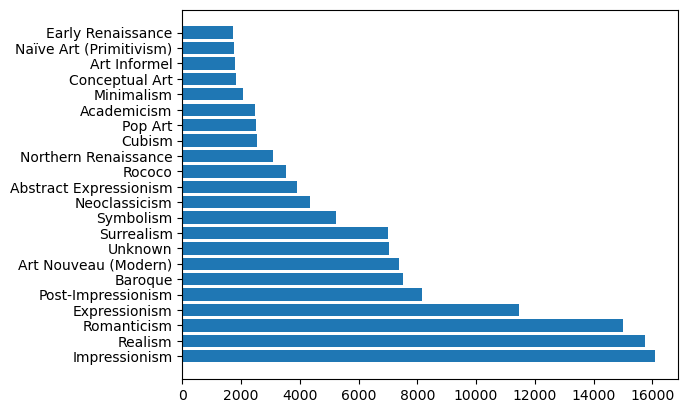

In [55]:
plt.barh(style_l1,style_n1)
plt.xticks()

Filtered the dataset by having only 22 styles

In [34]:
df2 = df[df['style'].isin(style_l1)]

Creating a list of styles from df2

In [15]:
lista = list(set(df2["style"]))
print(len(lista))


22


MODEL

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading the model that was already trained before

In [23]:
model = tf.keras.models.load_model('modelW1.h5')

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'wikiart\\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 26492 images belonging to 22 classes.


In [25]:
# Evaluate the model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

828/828 [==============================] - 219s 264ms/step - loss: 4.0308 - accuracy: 0.2576
Test accuracy: 0.25762495398521423


Testing on Images

In [56]:
import tensorflow as tf
import numpy as np
from PIL import Image



# Load and preprocess the input image
image = Image.open('Clocks.png')
image = image.resize((224, 224))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the model
predictions = model.predict(image)[0]

# Display the predicted class names and confidence scores
for i in range(len(predictions)):
    class_name = style_l1[i]
    confidence = predictions[i] * 100
    print(f"{class_name}: {confidence:.2f}%")

1/1 [==============================] - 0s 37ms/step
Impressionism: 0.06%
Realism: 0.00%
Romanticism: 0.01%
Expressionism: 0.46%
Post-Impressionism: 0.00%
Baroque: 0.00%
Art Nouveau (Modern): 0.00%
Unknown: 0.00%
Surrealism: 79.52%
Symbolism: 8.77%
Neoclassicism: 0.00%
Abstract Expressionism: 0.00%
Rococo: 0.02%
Northern Renaissance: 0.03%
Cubism: 0.05%
Pop Art: 9.98%
Academicism: 0.02%
Minimalism: 0.00%
Conceptual Art: 0.00%
Art Informel: 0.15%
Naïve Art (Primitivism): 0.09%
Early Renaissance: 0.83%


In [40]:
import tensorflow as tf
import numpy as np
from PIL import Image



# Load and preprocess the input image
image = Image.open('DALL·E 2023-02-21 00.05.33 - minimalism.png')
image = image.resize((224, 224))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the model
predictions = model.predict(image)[0]

# Display the predicted class names and confidence scores
for i in range(len(predictions)):
    class_name = style_l1[i]
    confidence = predictions[i] * 100
    print(f"{class_name}: {confidence:.2f}%")

1/1 [==============================] - 0s 28ms/step
Impressionism: 2.28%
Realism: 0.00%
Romanticism: 0.87%
Expressionism: 0.08%
Post-Impressionism: 0.00%
Baroque: 1.02%
Art Nouveau (Modern): 0.00%
Unknown: 0.00%
Surrealism: 0.15%
Symbolism: 0.08%
Neoclassicism: 85.54%
Abstract Expressionism: 0.00%
Rococo: 0.02%
Northern Renaissance: 0.00%
Cubism: 0.15%
Pop Art: 0.08%
Academicism: 5.34%
Minimalism: 0.00%
Conceptual Art: 4.01%
Art Informel: 0.07%
Naïve Art (Primitivism): 0.21%
Early Renaissance: 0.10%


In [57]:
import tensorflow as tf
import numpy as np
from PIL import Image



# Load and preprocess the input image
image = Image.open('DALL·E 2023-02-21 00.07.14 - mask surrealism.png')
image = image.resize((224, 224))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the model
predictions = model.predict(image)[0]

# Display the predicted class names and confidence scores
for i in range(len(predictions)):
    class_name = style_l1[i]
    confidence = predictions[i] * 100
    print(f"{class_name}: {confidence:.2f}%")

1/1 [==============================] - 0s 39ms/step
Impressionism: 0.01%
Realism: 0.00%
Romanticism: 0.00%
Expressionism: 0.01%
Post-Impressionism: 0.00%
Baroque: 0.00%
Art Nouveau (Modern): 0.00%
Unknown: 0.59%
Surrealism: 77.40%
Symbolism: 0.00%
Neoclassicism: 0.00%
Abstract Expressionism: 17.59%
Rococo: 0.00%
Northern Renaissance: 0.00%
Cubism: 0.01%
Pop Art: 0.09%
Academicism: 0.00%
Minimalism: 0.00%
Conceptual Art: 0.00%
Art Informel: 4.13%
Naïve Art (Primitivism): 0.00%
Early Renaissance: 0.18%


In [51]:
import tensorflow as tf
import numpy as np
from PIL import Image



# Load and preprocess the input image
image = Image.open('4834.Courbet_2C002D00_The_2D00_Desperate_2D00_Man.jpg.optimal.jpg')
image = image.resize((224, 224))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the model
predictions = model.predict(image)[0]

# Display the predicted class names and confidence scores
for i in range(len(predictions)):
    class_name = style_l1[i]
    confidence = predictions[i] * 100
    print(f"{class_name}: {confidence:.2f}%")

1/1 [==============================] - 0s 26ms/step
Impressionism: 0.00%
Realism: 75.06%
Romanticism: 0.00%
Expressionism: 0.00%
Post-Impressionism: 0.02%
Baroque: 0.00%
Art Nouveau (Modern): 0.06%
Unknown: 0.02%
Surrealism: 19.71%
Symbolism: 0.05%
Neoclassicism: 0.00%
Abstract Expressionism: 0.00%
Rococo: 0.00%
Northern Renaissance: 0.00%
Cubism: 0.00%
Pop Art: 0.00%
Academicism: 5.05%
Minimalism: 0.00%
Conceptual Art: 0.01%
Art Informel: 0.00%
Naïve Art (Primitivism): 0.01%
Early Renaissance: 0.01%


In [58]:
import tensorflow as tf
import numpy as np
from PIL import Image



# Load and preprocess the input image
image = Image.open('Realism - Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg')
image = image.resize((224, 224))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the model
predictions = model.predict(image)[0]

# Display the predicted class names and confidence scores
for i in range(len(predictions)):
    class_name = style_l1[i]
    confidence = predictions[i] * 100
    print(f"{class_name}: {confidence:.2f}%")

1/1 [==============================] - 0s 32ms/step
Impressionism: 0.05%
Realism: 0.00%
Romanticism: 0.00%
Expressionism: 0.00%
Post-Impressionism: 0.00%
Baroque: 0.01%
Art Nouveau (Modern): 0.56%
Unknown: 0.00%
Surrealism: 0.62%
Symbolism: 0.00%
Neoclassicism: 0.00%
Abstract Expressionism: 0.00%
Rococo: 0.00%
Northern Renaissance: 1.58%
Cubism: 0.00%
Pop Art: 0.00%
Academicism: 0.00%
Minimalism: 0.00%
Conceptual Art: 0.02%
Art Informel: 5.20%
Naïve Art (Primitivism): 0.00%
Early Renaissance: 91.96%
